Loading Video Frames
====================

``trackpy`` uses three classes for loading video:

* ``ImageSequence`` reads images from a directory.
* ``Video`` reads standard video files (AVI, MOV, etc.).
* ``TiffStack`` reads multi-frame TIF / TIFF files.

Once loaded, these objects can be handled alike. In programming terms, each is a subclass of a generic ``Frames`` object.
The differences between the formats are all handled invisibly.

### Load sequential images from a directory.

Take ``ImageSequence`` as an example. We have a folder of images at `../sample_data/bulk_water`. We can load them into an ``ImageSequence`` object.

In [1]:
# We also need Python's plotting library, matplotlib.
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'  # Set grayscale images as default.

import trackpy as tp
import pims

/Users/dallan/miniconda/envs/trackpy-examples/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
v = pims.ImageSequence('../sample_data/bulk_water/*.png')

We can access any frame like `v[frame_number]`. We can print it directly, as an array of brightness values, or we can visualize it using `imshow`.

Frame([[[146, 125,  54, 255],
        [146, 125,  54, 255],
        [146, 125,  56, 255],
        ..., 
        [140, 120,  55, 255],
        [141, 120,  59, 255],
        [142, 121,  60, 255]],

       [[146, 125,  54, 255],
        [146, 125,  54, 255],
        [146, 125,  56, 255],
        ..., 
        [140, 120,  55, 255],
        [142, 121,  60, 255],
        [142, 121,  60, 255]],

       [[146, 125,  56, 255],
        [146, 125,  56, 255],
        [146, 124,  58, 255],
        ..., 
        [141, 121,  56, 255],
        [143, 123,  59, 255],
        [144, 124,  60, 255]],

       ..., 
       [[146, 125,  66, 255],
        [147, 126,  67, 255],
        [146, 125,  64, 255],
        ..., 
        [129, 108,  37, 255],
        [120,  98,  32, 255],
        [119,  97,  31, 255]],

       [[146, 125,  64, 255],
        [146, 125,  64, 255],
        [145, 125,  61, 255],
        ..., 
        [137, 116,  47, 255],
        [129, 109,  44, 255],
        [126, 106,  41, 255]],

       [[146, 125,  64, 255],
        [146, 125,  64, 255],
        [145, 125,  61, 255],
        ..., 
        [145, 124,  55, 255],
        [139, 119,  54, 255],
        [137, 117,  52, 255]]], dtype=uint8)
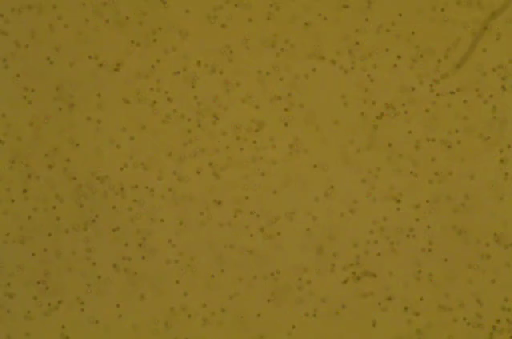

In [3]:
v[0]

<IPython.core.display.Javascript object>


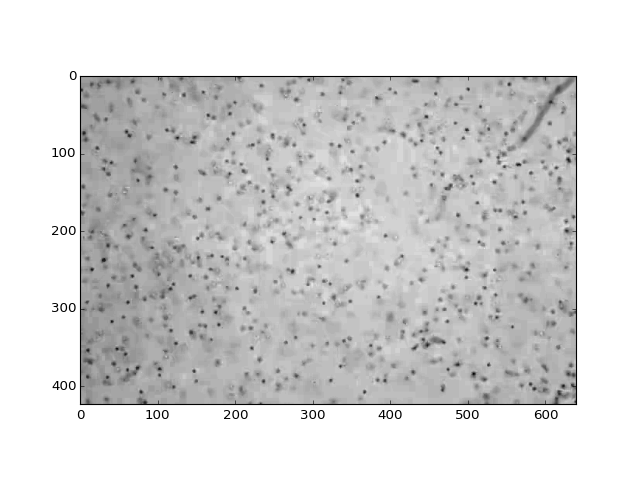

In [4]:
plt.imshow(v[0])

This is a color image. Most analysis will require a grayscale image. There are many ways to convert color to gray. Below, we just define a simple function to take the red channel only.

In [5]:
def gray(image):
    return image[:, :, 0]

v = pims.ImageSequence('../sample_data/bulk_water/*.png', process_func=gray)

plt.imshow(v[0])

### Use subsections of the loaded frames.

We can select a subset of the frames for viewing or processing. Examples:

* ``v[3]`` frame three (an array)
* ``v[:10]`` first 10 frames (a list of arrays)
* ``v[2:5]`` frames 2-5 including 2 and 5 (a list of arrays)
* ``v[100:]`` frames 100 to the end (a list of arrays)

In [6]:
for frame in v[2:5]:
    # Do something with each frame.
    pass

### Load multi-frame TIFFs or video files.

``ImageSequence`` works out of the box. It relies only on numpy and scipy, which are required dependencies of ``trackpy``. ``Video`` needs FFmpeg, an open-source video reader not related to Python. (See the installation instructions in the README.). ``TiffStack`` needs either PIL or libtiff; it can use whichever is available.

Once these dependencies are in place, ``Video`` and ``TiffStack`` work in the same way as ``ImageSequence``.